In [ ]:
!pip install -U langchain-community openai  langchain

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.1/755.1 kB 9.8 MB/s eta 0:00:00
  Attempting uninstall: openai
    Found existing installation: openai 1.93.0
    Uninstalling openai-1.93.0:
      Successfully uninstalled openai-1.93.0


In [ ]:
from langchain_community.llms import OpenAI

In [ ]:
openai_api_key = input('Enter your OpenAI API key')

In [ ]:
llm = OpenAI(model_name="gpt-3.5-turbo-instruct", temperature=0, api_key=openai_api_key)

In [ ]:
from IPython.display import Markdown, display

In [ ]:
response = llm.invoke('what is zero-shot chain-of-thought prompting?')
Markdown(response)



Zero-shot chain-of-thought prompting is a technique used in natural language processing (NLP) to generate coherent and relevant responses from a machine learning model without any prior training on a specific topic or task. It involves prompting the model with a series of related questions or statements, allowing it to generate a chain of responses that build upon each other and form a coherent conversation. This approach is useful for tasks such as dialogue generation, question-answering, and text summarization, where the model needs to generate responses on a wide range of topics without being explicitly trained on each one.

In [ ]:
!pip install -qqq arxiv

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.9 MB/s eta 0:00:00


In [ ]:
import arxiv

In [ ]:
paper = next(arxiv.Search(id_list=['2205.11916']).results())

Markdown(paper.summary)

/tmp/ipython-input-30-2584544806.py:1: DeprecationWarning: The 'Search.results' method is deprecated, use 'Client.results' instead
  paper = next(arxiv.Search(id_list=['2205.11916']).results())


Pretrained large language models (LLMs) are widely used in many sub-fields of
natural language processing (NLP) and generally known as excellent few-shot
learners with task-specific exemplars. Notably, chain of thought (CoT)
prompting, a recent technique for eliciting complex multi-step reasoning
through step-by-step answer examples, achieved the state-of-the-art
performances in arithmetics and symbolic reasoning, difficult system-2 tasks
that do not follow the standard scaling laws for LLMs. While these successes
are often attributed to LLMs' ability for few-shot learning, we show that LLMs
are decent zero-shot reasoners by simply adding "Let's think step by step"
before each answer. Experimental results demonstrate that our Zero-shot-CoT,
using the same single prompt template, significantly outperforms zero-shot LLM
performances on diverse benchmark reasoning tasks including arithmetics
(MultiArith, GSM8K, AQUA-RAT, SVAMP), symbolic reasoning (Last Letter, Coin
Flip), and other logical reasoning tasks (Date Understanding, Tracking Shuffled
Objects), without any hand-crafted few-shot examples, e.g. increasing the
accuracy on MultiArith from 17.7% to 78.7% and GSM8K from 10.4% to 40.7% with
large InstructGPT model (text-davinci-002), as well as similar magnitudes of
improvements with another off-the-shelf large model, 540B parameter PaLM. The
versatility of this single prompt across very diverse reasoning tasks hints at
untapped and understudied fundamental zero-shot capabilities of LLMs,
suggesting high-level, multi-task broad cognitive capabilities may be extracted
by simple prompting. We hope our work not only serves as the minimal strongest
zero-shot baseline for the challenging reasoning benchmarks, but also
highlights the importance of carefully exploring and analyzing the enormous
zero-shot knowledge hidden inside LLMs before crafting finetuning datasets or
few-shot exemplars.

In [ ]:
updated_response = llm.invoke(f"""Here is a summary of a paper:

{paper.summary}

  based on the summary, what is zero-shot chain-of-thought prompting?""")

Markdown(updated_response)



Zero-shot chain-of-thought prompting is a technique that utilizes large language models (LLMs) to perform complex multi-step reasoning tasks without any hand-crafted few-shot examples. By simply adding the phrase "Let's think step by step" before each answer, the LLMs are able to achieve high accuracy on diverse benchmark reasoning tasks, suggesting untapped and understudied zero-shot capabilities of LLMs. This technique serves as a strong baseline for challenging reasoning benchmarks and highlights the importance of exploring and analyzing the zero-shot knowledge hidden inside LLMs.

In [ ]:
!pip install -qqq pypdf

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 3.6 MB/s eta 0:00:00


In [ ]:
paper_path = paper.download_pdf()

In [ ]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader(paper_path)
pages = loader.load_and_split()

In [ ]:
len(pages)

49

In [ ]:
content = "\n\n".join([page.page_content for page in pages[0:3]])

In [ ]:
response = llm.invoke(f"""Here is the first 3 pages of a paper:

{content}

Based on the content, what is zero-shot chain-of-thought prompting?""")

Markdown(response)



Zero-shot chain-of-thought prompting is a technique for eliciting complex multi-step reasoning through step-by-step answer examples without the need for task-specific few-shot examples. It involves adding the prompt "Let's think step by step" before each answer to facilitate step-by-step thinking and improve the performance of large language models on various reasoning tasks. This approach is versatile and task-agnostic, making it applicable to a wide range of reasoning tasks without the need for task-specific modifications.

In [ ]:
!pip install -qqq tiktoken faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 29.7 MB/s eta 0:00:00


In [ ]:
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [ ]:
text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=0)
docs = text_splitter.split_documents(pages)

embeddings = OpenAIEmbeddings(openai_api_key=openai_api_key)
db = FAISS.from_documents(docs, embeddings)

In [ ]:
docs = db.similarity_search(query="what is zero-shot chain-of-thought prompting?")

In [ ]:
Markdown(docs[0].page_content)

language models like PaLM [Chowdhery et al., 2022]. The top row of Figure 1 shows standard
few-shot prompting against (few-shot) CoT prompting. Notably, few-shot learning was taken as a
given for tackling such difﬁcult tasks, and the zero-shot baseline performances were not even reported
in the original work [Wei et al., 2022]. To differentiate it from our method, we call Wei et al. [2022]
as Few-shot-CoT in this work.
3 Zero-shot Chain of Thought
We propose Zero-shot-CoT, a zero-shot template-based prompting for chain of thought reasoning.
It differs from the original chain of thought prompting [Wei et al., 2022] as it does not require
step-by-step few-shot examples, and it differs from most of the prior template prompting [Liu et al.,
2021b] as it is inherently task-agnostic and elicits multi-hop reasoning across a wide range of tasks
with a single template. The core idea of our method is simple, as described in Figure 1: add Let’s

### Using extisting chain

In [ ]:
from langchain.chains.qa_with_sources import load_qa_with_sources_chain

In [ ]:
chain = load_qa_with_sources_chain(llm, chain_type="stuff")
query = "what is zero-shot chain-of-thought prompting?"
sources = db.similarity_search(query)
results = chain({"input_documents": sources, "question": query}, return_only_outputs=True)

In [ ]:
Markdown(results['output_text'])

 Zero-shot chain-of-thought prompting is a method of prompting large language models to perform multi-step reasoning tasks without the need for step-by-step few-shot examples. It differs from previous prompting methods as it is task-agnostic and does not require in-context learning. 
SOURCES: ./2205.11916v4.Large_Language_Models_are_Zero_Shot_Reasoners.pdf

### Deployment

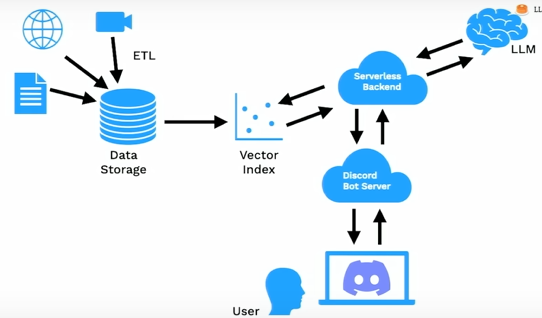

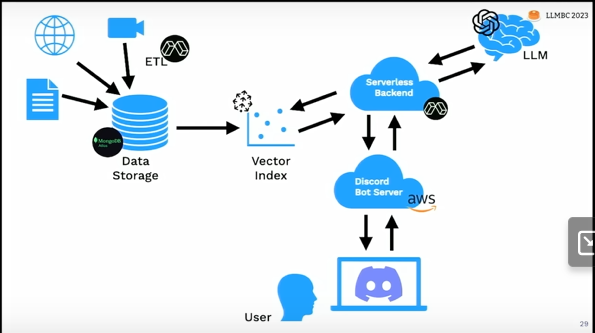